## ARIMA 모델을 이용한 유튜버 뷔브독 성장률 예측

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [18]:
df = pd.read_csv('뷔브독.csv',index_col = 'searchDate')

In [19]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,6976,54500,225,0,38
2020-02-15,6042,54500,226,0,36
2020-02-16,9796,54500,227,0,43
2020-02-17,10037,54500,227,0,43
2020-02-18,6946,54400,227,0,38
...,...,...,...,...,...
2021-02-12,5813,69100,305,98,22
2021-02-13,5503,69100,305,98,21
2021-02-14,6724,69100,306,98,22


## 컬럼 정리 (구독자 수만 남겨놓기)

In [20]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [21]:
df

,subscriberCount
searchDate,
2020-02-14,54500
2020-02-15,54500
2020-02-16,54500
2020-02-17,54500
2020-02-18,54400
...,...
2021-02-12,69100
2021-02-13,69100
2021-02-14,69100


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [22]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [23]:
train_df = df[:target_date]

In [24]:
test_df = df[target_date:]

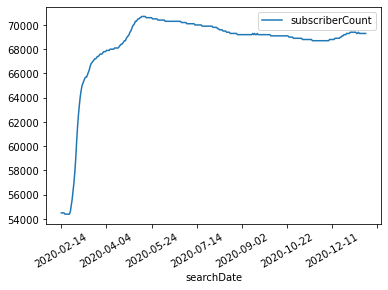

In [25]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [32]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,0,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  338
Model:                     ARMA(2, 2)   Log Likelihood               -1921.410
Method:                       css-mle   S.D. of innovations             70.106
Date:                Tue, 16 Feb 2021   AIC                           3854.820
Time:                        15:16:17   BIC                           3877.758
Sample:                             0   HQIC                          3863.962
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.929e+04   4712.265     14.704      0.000    6.01e+04    7.85e+04
ar.L1.y        1.9400      0.027     72.732      0.000       1.888       1.992
ar.L2.y       -0.9415      0.028    -33.379      0.0

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 최종 30일 예측값 시각화

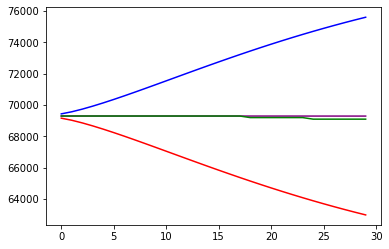

In [34]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터입니다. 
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([94000,108000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [35]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

59.24081937848823


In [36]:
forecast_data[0]

array([69299.94564494, 69299.95897138, 69299.9546918 , 69299.93384176,
       69299.89742124, 69299.84639515, 69299.78169402, 69299.70421454,
       69299.61482021, 69299.51434199, 69299.40357895, 69299.28329892,
       69299.15423915, 69299.01710704, 69298.87258076, 69298.72130998,
       69298.56391653, 69298.4009951 , 69298.23311396, 69298.06081561,
       69297.88461747, 69297.70501261, 69297.5224704 , 69297.33743717,
       69297.15033694, 69296.96157203, 69296.77152376, 69296.5805531 ,
       69296.38900128, 69296.19719049])

## 발표날까지 예측

In [39]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.subscriberCount.values, order=(2,0,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  368
Model:                     ARMA(2, 2)   Log Likelihood               -2079.341
Method:                       css-mle   S.D. of innovations             67.835
Date:                Tue, 16 Feb 2021   AIC                           4170.681
Time:                        15:17:20   BIC                           4194.130
Sample:                             0   HQIC                          4179.997
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.927e+04   3613.672     19.170      0.000    6.22e+04    7.64e+04
ar.L1.y        1.9411      0.025     78.113      0.000       1.892       1.990
ar.L2.y       -0.9427      0.026    -36.141      0.0

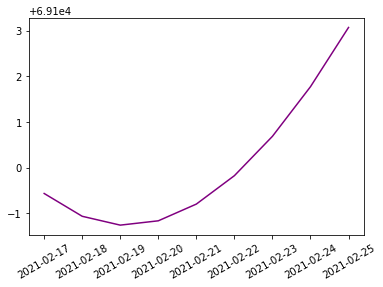

In [40]:
# 2021/02/16 데이터셋으로부터 발표날까지 9일 예측
forecast_data = model_fit.forecast(steps=9) 

pred_y = forecast_data[0].tolist() #예측 데이터입니다.

#plt.ylim([94000,108000])
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', 
            '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25'])
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프입니다.

In [41]:
forecast_data[0].astype(int)

array([69099, 69098, 69098, 69098, 69099, 69099, 69100, 69101, 69103])